In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
from IPython.display import clear_output
from src import spotify, dp, utils, DB

db = DB()

In [12]:
# 1. Get Token
token = spotify.get_token()

# 2. Select Music
sel_tracks = spotify.search_tracks(token)
mail_box_id = str(db.regist_mail_box(sel_tracks).inserted_id)

# 3. Data Processing
genres = spotify.get_genres(token, sel_tracks)
features = spotify.get_features(token, sel_tracks)
db.observe_seed_zone(features)

recos = spotify.get_recommend(sel_tracks, features, genres, token)
reco_features = spotify.get_features(token, recos)

계속하시려면 next, 종료는 exit를 입력해주세요.exit


### sel tracks (우체통)
- 사용자의 음악 성향

In [13]:
sel_tracks.head()

,id,name,artists,artists_name,image
0,2y4hHM6c48Qzk0bqh33XfB,Winter Sleep,3HqSLMAZ3g3d5poNaI7GOU,IU,https://i.scdn.co/image/ab67616d0000b2730d378c...
1,1OQ3PoRZRtE7RH0NIh3p1O,Drawer,6zn0ihyAApAYV51zpXxdEp,10cm,https://i.scdn.co/image/ab67616d0000b273b22853...


In [14]:
features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2y4hHM6c48Qzk0bqh33XfB,0.539,0.237,0,-8.452,0.0273,0.820,0,0.345,0.259,68.045
1,1OQ3PoRZRtE7RH0NIh3p1O,0.359,0.469,7,-8.060,0.0326,0.745,0,0.101,0.259,84.366


### recos
- 사용자가 등록한 음악으로 Spotify API 에서 추천된 음악

In [15]:
recos.head()

,id,name,artists,artists_name,image
1,2RttW7RAu5nOAfq6YFvApB,Happier,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,https://i.scdn.co/image/ab67616d0000b273ba5db4...
2,1cayXr914ctuYeJkv3CPUR,Rest,6dhfy4ByARPJdPtMyrUYJK,Yerin Baek,https://i.scdn.co/image/ab67616d0000b273654022...
3,1e5qALs3pDrv203jX0XWAC,Autumn Breeze,0hRHbwZ0xSwfVHl4FTv7jq,Gummy,https://i.scdn.co/image/ab67616d0000b27339f1cc...
4,4rwqrKdwlFWJ6LvPYaOtgn,Quit (feat. Ariana Grande),2LZDXcxJWgsJfKXZv9a5eG,Cashmere Cat,https://i.scdn.co/image/ab67616d0000b273747de7...
5,6jMbPsH6lTOLs5n8Af26AG,Maybe It's Time,"1HY2Jd0NmPuamShAr6KMms,4VIvfOurcf0vuLRxLkGnIG","Lady Gaga,Bradley Cooper",https://i.scdn.co/image/ab67616d0000b273e2d156...


In [8]:
reco_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,3vZvHyE5Vpjqxyh0TPOO73,0.774,0.653,4,-5.686,0.0640,0.533,0.000000,0.1160,0.955,135.120
1,0lSJQip2wVidbu1JfZ4IEQ,0.842,0.522,4,-5.815,0.0329,0.719,0.000000,0.1910,0.641,119.045
2,5IV28bUA0OxEtY1pMnQv4c,0.625,0.477,4,-5.981,0.0363,0.633,0.000000,0.1390,0.239,136.242
3,4OGE9JDSqSGrfi7AF158uG,0.747,0.661,4,-6.523,0.0813,0.308,0.000016,0.0768,0.905,97.984
4,1Fhb9iJPufNMZSwupsXiRe,0.711,0.747,0,-6.335,0.0523,0.459,0.000000,0.0957,0.852,136.000


In [16]:
recos

,id,name,artists,artists_name,image
1,2RttW7RAu5nOAfq6YFvApB,Happier,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,https://i.scdn.co/image/ab67616d0000b273ba5db4...
2,1cayXr914ctuYeJkv3CPUR,Rest,6dhfy4ByARPJdPtMyrUYJK,Yerin Baek,https://i.scdn.co/image/ab67616d0000b273654022...
3,1e5qALs3pDrv203jX0XWAC,Autumn Breeze,0hRHbwZ0xSwfVHl4FTv7jq,Gummy,https://i.scdn.co/image/ab67616d0000b27339f1cc...
4,4rwqrKdwlFWJ6LvPYaOtgn,Quit (feat. Ariana Grande),2LZDXcxJWgsJfKXZv9a5eG,Cashmere Cat,https://i.scdn.co/image/ab67616d0000b273747de7...
5,6jMbPsH6lTOLs5n8Af26AG,Maybe It's Time,"1HY2Jd0NmPuamShAr6KMms,4VIvfOurcf0vuLRxLkGnIG","Lady Gaga,Bradley Cooper",https://i.scdn.co/image/ab67616d0000b273e2d156...
...,...,...,...,...,...
195,610IckJdwTyY8nez5v64DH,"YOUR SONG (With Lee Jin Ah, Jung Seung Hwan, K...",4BBN286rBKyCWsSPq2cxYO,Sam Kim,https://i.scdn.co/image/ab67616d0000b273112e78...
196,3DXncPQOG4VBw3QHh3S817,"I'm the One (feat. Justin Bieber, Quavo, Chanc...",0QHgL1lAIqAw0HtD7YldmP,DJ Khaled,https://i.scdn.co/image/ab67616d0000b273dcb6a7...
197,4cOxx9vS7Zda7m0RzAsGMG,First Loss,4z6yrDz5GfKXkeQZjOaZdq,DAVICHI,https://i.scdn.co/image/ab67616d0000b2735d564e...
198,7un5FM27KmkEMpsPQ2T062,friend to lover,6a3Mfrn2XBR1DfPg1QGa1d,Standing Egg,https://i.scdn.co/image/ab67616d0000b2735db3c3...


### norm data
- 정규화

In [17]:
norm_features = dp.make_norm(features, reco_features)

norm_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2y4hHM6c48Qzk0bqh33XfB,0.447407,0.111111,0.000000,0.499137,0.005959,0.852570,0.000000,0.436388,0.185360,0.036434
1,1OQ3PoRZRtE7RH0NIh3p1O,0.180741,0.464231,0.636364,0.529887,0.018107,0.773589,0.000000,0.071610,0.185360,0.152234
2,2RttW7RAu5nOAfq6YFvApB,0.422222,0.336377,0.000000,0.585190,0.009397,0.553496,0.000000,0.122440,0.158205,0.190732
3,1cayXr914ctuYeJkv3CPUR,0.651852,0.322679,0.000000,0.453561,0.023608,0.979992,0.000026,0.185229,0.255018,0.142549
4,1e5qALs3pDrv203jX0XWAC,0.401481,0.445967,0.000000,0.575227,0.078845,0.785173,0.000000,0.132905,0.337662,0.090669


### 추천된 데이터들의 audio features 시각화

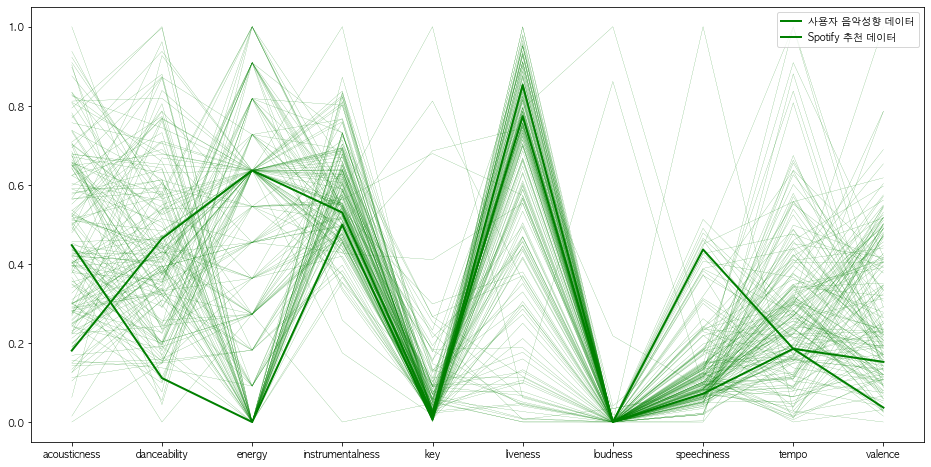

In [18]:
utils.visual_norm_data(sel_tracks, norm_features)

### KMeans

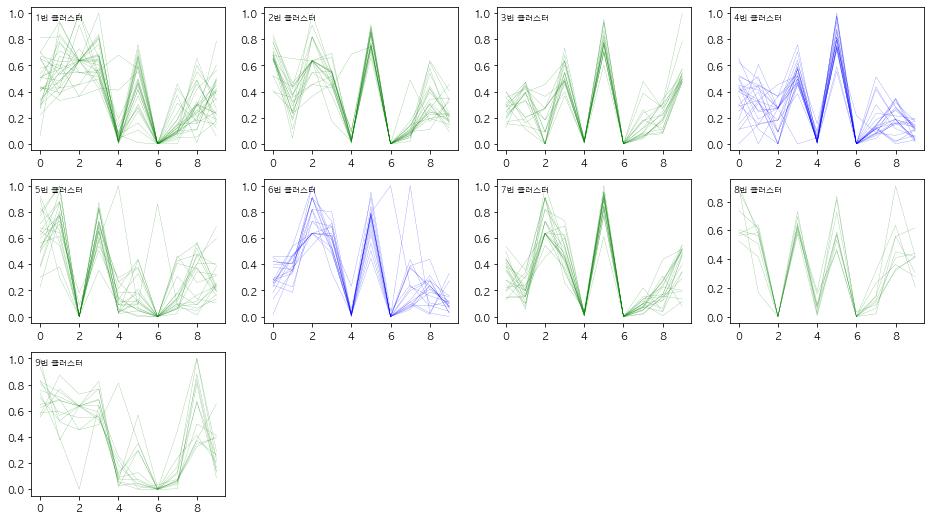

In [19]:
filter_music_list, kmeans = utils.reco_KMeans(norm_features, sel_tracks)

utils.visual_cluster_data(sel_tracks, kmeans)

In [20]:
_filtering_music_list = dp.music_filtering(sel_tracks, kmeans)

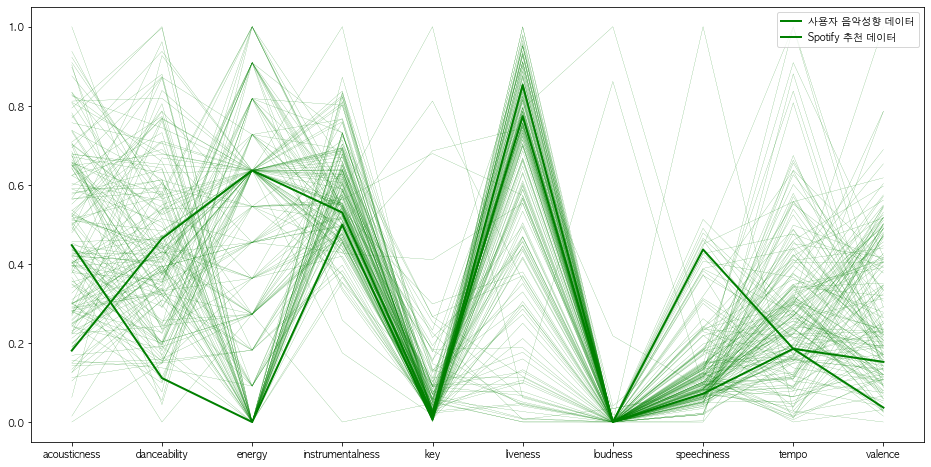

In [21]:
utils.visual_norm_data(sel_tracks, norm_features)

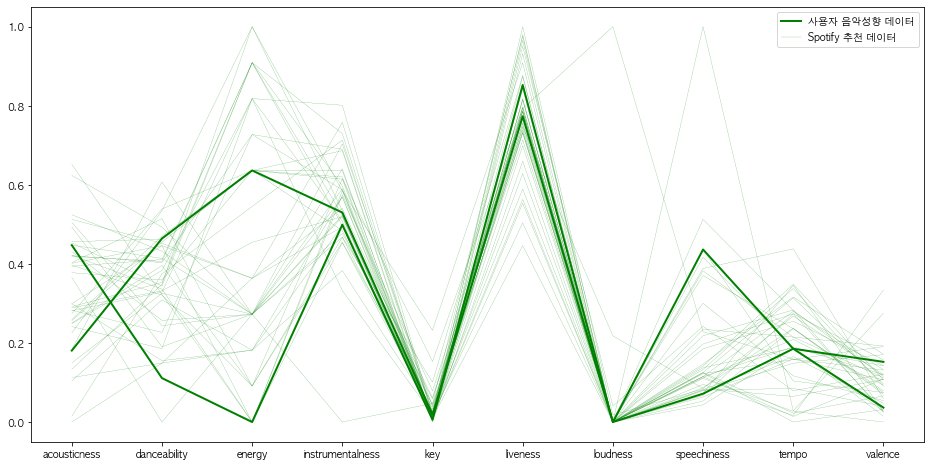

,id,name,artists,artists_name,image
1,2RttW7RAu5nOAfq6YFvApB,Happier,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,https://i.scdn.co/image/ab67616d0000b273ba5db4...
2,1cayXr914ctuYeJkv3CPUR,Rest,6dhfy4ByARPJdPtMyrUYJK,Yerin Baek,https://i.scdn.co/image/ab67616d0000b273654022...
3,1e5qALs3pDrv203jX0XWAC,Autumn Breeze,0hRHbwZ0xSwfVHl4FTv7jq,Gummy,https://i.scdn.co/image/ab67616d0000b27339f1cc...
11,5BqwC9kOBbqYkzdOKeXFFk,for lovers who hesitate,2SY6OktZyMLdOnscX3DCyS,JANNABI,https://i.scdn.co/image/ab67616d0000b273f694ad...
12,3P3UA61WRQqwCXaoFOTENd,Through the Night,3HqSLMAZ3g3d5poNaI7GOU,IU,https://i.scdn.co/image/ab67616d0000b273c06f0e...


In [22]:
filter_music = norm_features.set_index("id").loc[_filtering_music_list].reset_index()
reco_musics = [_ in _filtering_music_list for _ in recos['id']]

utils.visual_norm_data(sel_tracks, filter_music)
recos[reco_musics].head()

In [30]:
recos[reco_musics]['image'][12]

'https://i.scdn.co/image/ab67616d0000b273c06f0e8b33ac2d246158253e'

In [15]:
res = db.regist_mail(mail_box_id, recos[reco_musics])
mail_id = res.inserted_id
print("우체통({})에\n추천 플레이리스트 MuLetter({})가 등록되었습니다.".format(
    mail_box_id
    ,str(mail_id)))

우체통(6242ba072ec7c3e4d29f2c49)에
추천 플레이리스트 MuLetter(6242ba272ec7c3e4d29f2c4d)가 등록되었습니다.


In [16]:
genres

,artists,genres
0,2o8gT0fQmFxGNbowbdgeZe,"k-pop,hip-hop"
1,0siBQaURCli5wn2lqv8WZg,"k-pop,pop"


In [27]:
recos[reco_musics]

,id,name,artists,artists_name
1,3vZvHyE5Vpjqxyh0TPOO73,In My Mood,7cEaNXXTHx3LokbjUUyHal,BIG Naughty
4,4OGE9JDSqSGrfi7AF158uG,Shy (eh o),1MAUqH0haKBYbjpknTfreY,PENOMECO
5,1Fhb9iJPufNMZSwupsXiRe,beside you,3pc0bOVB5whxmD50W79wwO,keshi
13,794QVQtFNy7hvtjQP1keQd,1942 (feat. Yo Gotti & YBN Nahmir),02kJSzxNuaWGqwubyUba0Z,G-Eazy
19,4F1yvJfQ7gJkrcgFJQDjOr,Playinwitme (feat. Kehlani),4qBgvVog0wzW75IQ48mU7v,KYLE
21,5h40ovzXu7rF7Giwb9oXYy,Girls,03r4iKL2g2442PT9n2UKsx,Beastie Boys
22,1f5cbQtDrykjarZVrShaDI,Drowning (feat. Kodak Black),31W5EY0aAly4Qieq6OFu6I,A Boogie Wit da Hoodie
26,15LVXIWDmQA7mLUnLJn1AF,D-day (Feat. GIRIBOY),7lXgbtBDcCRbfc5f8FhGUL,Hoody
29,48ZUwXrEOhaXLCxvmRYhZv,Don't Sweat The Technique,6jHG1YQkqgojdEzerwvrVv,Eric B. & Rakim
33,3iL2l5gUqyPS6vDwJFgJTR,BedRock,5OrB6Jhhrl9y2PK0pSV4VP,Young Money


In [31]:
spotify.get_genres(token,recos[reco_musics]).head()

,artists,genres
0,7cEaNXXTHx3LokbjUUyHal,"k-pop,hip-hop"
1,1MAUqH0haKBYbjpknTfreY,"k-pop,pop,hip-hop"
2,3pc0bOVB5whxmD50W79wwO,"chill,pop"
3,02kJSzxNuaWGqwubyUba0Z,"pop,hip-hop,k-pop"
4,4qBgvVog0wzW75IQ48mU7v,"pop,hip-hop"
